In [17]:
%pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 323 kB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 85.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 47.3 MB/s eta 0:00:01
     |████████████████████████████████| 15.1 MB 82.8 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [25]:
pd.set_option('display.max_colwidth', 50)

In [42]:
df = pd.read_csv("../DATA/FoodAccessAtlascleaned_groupedbyCounty.csv")

In [49]:
df.shape

(72531, 58)

In [8]:
main_df = pd.read_csv("../DATA/FoodAccessResearchAtlasData2019.csv")

In [10]:
main_df.columns[135]

'TractLOWI'

In [11]:
df.drop(columns=['lapop1', 'lapop1share', 'lalowi1',
       'lalowi1share', 'lakids1', 'lakids1share', 'laseniors1',
       'laseniors1share', 'lawhite1', 'lawhite1share', 'lablack1',
       'lablack1share', 'laasian1', 'laasian1share', 'lanhopi1',
       'lanhopi1share', 'laaian1', 'laaian1share', 'laomultir1',
       'laomultir1share', 'lahisp1', 'lahisp1share', 'lahunv1', 'lahunv1share',
       'lasnap1', 'lasnap1share', 'TractLOWI'], inplace=True)

In [12]:
df.shape

(72531, 69)

In [13]:
other_drops = [
    'LILATracts_1And10', 'LILATracts_1And20',
    'LA1and10', 'LA1and20', 
    'LATracts1', 'LATracts10', 'LATracts20', 
    'LAPOP1_10', 'LAPOP1_20',
    'LALOWI1_10', 'LALOWI1_20']
df.drop(columns=other_drops, inplace=True)

In [14]:
df.shape

(72531, 58)

In [15]:
df.to_csv("../DATA/FoodAccessAtlascleaned_groupedbyCounty.csv", index=False)

In [23]:
geo_df = gpd.read_file("../DATA/cb_2023_us_tract_5m/cb_2023_us_tract_5m.shp",)

In [26]:
geo_df.head()

,STATEFP,COUNTYFP,TRACTCE,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,04,023,966401,1400000US04023966401,04023966401,9664.01,Census Tract 9664.01,AZ,Santa Cruz County,Arizona,CT,8017697,7850,"POLYGON ((-110.96808 31.33514, -110.95336 31.3..."
1,06,037,800412,1400000US06037800412,06037800412,8004.12,Census Tract 8004.12,CA,Los Angeles County,California,CT,7171172,4017651,"POLYGON ((-118.82156 34.01394, -118.78625 34.0..."
2,06,037,577300,1400000US06037577300,06037577300,5773,Census Tract 5773,CA,Los Angeles County,California,CT,906095,2302747,"POLYGON ((-118.14156 33.76181, -118.13012 33.7..."
3,06,045,010400,1400000US06045010400,06045010400,104,Census Tract 104,CA,Mendocino County,California,CT,7024716,2704339,"POLYGON ((-123.81469 39.44654, -123.8043 39.47..."
4,09,150,901102,1400000US09150901102,09150901102,9011.02,Census Tract 9011.02,CT,Northeastern Connecticut Planning Region,Connecticut,CT,112448002,1434941,"POLYGON ((-72.09973 42.0288, -72.0635 42.02735..."


In [34]:
geo_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [43]:
df["CensusTract"] = df["CensusTract"].astype(str)

In [44]:
merged_data = df.merge(geo_df, left_on='CensusTract', right_on='GEOID', how='left')

In [48]:
merged_data.isna().sum().to_dict()

{'CensusTract': 0,
 'State': 0,
 'County': 0,
 'Urban': 0,
 'Pop2010': 0,
 'OHU2010': 0,
 'GroupQuartersFlag': 0,
 'NUMGQTRS': 0,
 'PCTGQTRS': 0,
 'LILATracts_halfAnd10': 0,
 'LILATracts_Vehicle': 0,
 'HUNVFlag': 0,
 'LowIncomeTracts': 0,
 'PovertyRate': 0,
 'MedianFamilyIncome': 0,
 'LAhalfand10': 0,
 'LATracts_half': 0,
 'LATractsVehicle_20': 0,
 'LAPOP05_10': 0,
 'LALOWI05_10': 0,
 'lapophalf': 0,
 'lapophalfshare': 0,
 'lalowihalf': 0,
 'lalowihalfshare': 0,
 'lakidshalf': 0,
 'lakidshalfshare': 0,
 'laseniorshalf': 0,
 'laseniorshalfshare': 0,
 'lawhitehalf': 0,
 'lawhitehalfshare': 0,
 'lablackhalf': 0,
 'lablackhalfshare': 0,
 'laasianhalf': 0,
 'laasianhalfshare': 0,
 'lanhopihalf': 0,
 'lanhopihalfshare': 0,
 'laaianhalf': 0,
 'laaianhalfshare': 0,
 'laomultirhalf': 0,
 'laomultirhalfshare': 0,
 'lahisphalf': 0,
 'lahisphalfshare': 0,
 'lahunvhalf': 0,
 'lahunvhalfshare': 0,
 'lasnaphalf': 0,
 'lasnaphalfshare': 0,
 'TractKids': 0,
 'TractSeniors': 0,
 'TractWhite': 0,
 'Tract

In [50]:
cat_attrs = ['County','Urban', 'GroupQuartersFlag', 
    'LILATracts_halfAnd10', 'LILATracts_Vehicle', 
    'HUNVFlag', 'LowIncomeTracts',
    'LAhalfand10', 'LATracts_half',
    'LATractsVehicle_20']

In [51]:
for cat in cat_attrs:
    df[cat] = df[cat].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CensusTract           72531 non-null  object  
 1   State                 72531 non-null  object  
 2   County                72531 non-null  category
 3   Urban                 72531 non-null  category
 4   Pop2010               72531 non-null  int64   
 5   OHU2010               72531 non-null  int64   
 6   GroupQuartersFlag     72531 non-null  category
 7   NUMGQTRS              72531 non-null  float64 
 8   PCTGQTRS              72531 non-null  float64 
 9   LILATracts_halfAnd10  72531 non-null  category
 10  LILATracts_Vehicle    72531 non-null  category
 11  HUNVFlag              72531 non-null  category
 12  LowIncomeTracts       72531 non-null  category
 13  PovertyRate           72531 non-null  float64 
 14  MedianFamilyIncome    72531 non-null  float64 
 15  LA

In [52]:
df['is_desert'].value_counts()

is_desert
0    63977
1     8554
Name: count, dtype: int64

In [61]:
binary_target = df['is_desert'].value_counts().to_frame().reset_index()
binary_target.columns = ['is_desert', 'count']  # Rename columns

melt_bin_tar = pd.melt(binary_target, id_vars='is_desert', value_vars='count')
melt_bin_tar.replace({0: 'No', 1: 'Yes'}, inplace=True)


In [62]:
melt_bin_tar

,is_desert,variable,value
0,No,count,63977
1,Yes,count,8554


Text(0.5, 0, '')

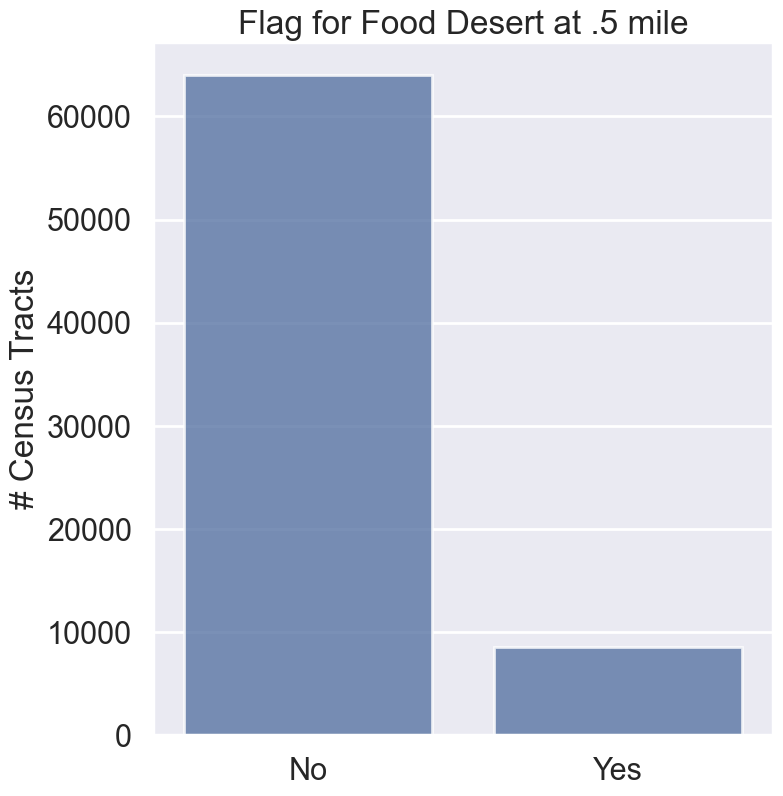

In [64]:
sns.set_theme('poster')
plt.figure(figsize=(8,9))
sns.barplot(x=melt_bin_tar['is_desert'], 
            y=melt_bin_tar['value'], 
            alpha = .80)
plt.title('Flag for Food Desert at .5 mile')
plt.ylabel('# Census Tracts')
plt.xlabel('')

In [70]:
# Get value counts and convert to DataFrame
county_yes = df['County'].loc[df['is_desert'] == 1].value_counts().to_frame()
county_no = df['County'].loc[df['is_desert'] == 0].value_counts().to_frame()

# Rename the 'count' columns to avoid conflict
county_yes.columns = ['food_desert_yes']
county_no.columns = ['food_desert_no']

# Join them on the index (County name)
county_df = county_yes.join(county_no, how='outer')


In [71]:
county_df


,food_desert_yes,food_desert_no
County,,
Abbeville County,2,4
Acadia Parish,2,10
Accomack County,1,8
Ada County,3,56
Adair County,1,21
...,...,...
Yukon-Koyukuk Census Area,4,0
Yuma County,1,54
Zapata County,1,2


In [133]:
county_df['Rate'] = round((county_df['food_desert_yes'] / 
                     (county_df['food_desert_yes'] + county_df['food_desert_no'])) * 100,2)


In [134]:
county_df

,food_desert_yes,food_desert_no,Rate
County,,,
Mora County,1,0,100.0
Norton city,1,0,100.0
Dimmit County,2,0,100.0
Tunica County,2,0,100.0
Kemper County,2,0,100.0
...,...,...,...
Gulf County,0,3,0.0
Roger Mills County,0,1,0.0
Rogers County,0,28,0.0


In [135]:
county_df.replace(np.nan, 0, inplace=True)

In [150]:
county_df.sort_values(by='Rate', ascending=False, inplace=True)

In [151]:
county_df.head(15)

,food_desert_yes,food_desert_no,Rate
County,,,
Yukon-Koyukuk Census Area,4,0,100.00
Mora County,1,0,100.00
Lake and Peninsula Borough,1,0,100.00
Kemper County,2,0,100.00
Dimmit County,2,0,100.00
Tunica County,2,0,100.00
Norton city,1,0,100.00
Bent County,1,0,100.00
Buena Vista city,1,0,100.00


<Axes: ylabel='County'>

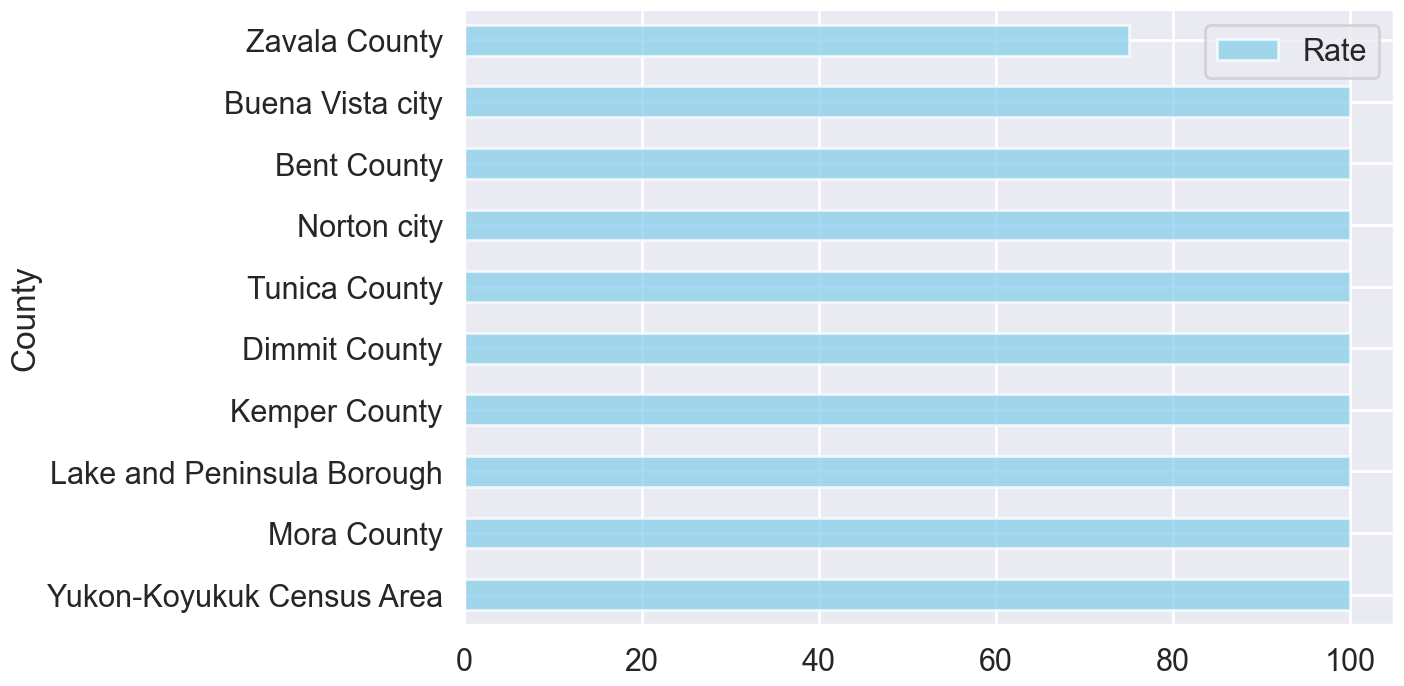

In [162]:
top10_rate.plot(kind='barh',x='County', y='Rate', figsize=(12,8), color='skyblue', alpha=0.75)

In [170]:
top10_count = county_df.sort_values(by='food_desert_yes', ascending=False, inplace=False).reset_index().head(10)

In [171]:
top10_count

,County,food_desert_yes,food_desert_no,Rate
0,Cook County,185,1135,14.02
1,Wayne County,178,584,23.36
2,Jefferson County,140,654,17.63
3,Los Angeles County,109,2225,4.67
4,Marion County,109,346,23.96
5,Maricopa County,106,807,11.61
6,Montgomery County,102,730,12.26
7,Dallas County,95,469,16.84
8,Philadelphia County,92,289,24.15
9,Harris County,92,699,11.63


<Axes: ylabel='County'>

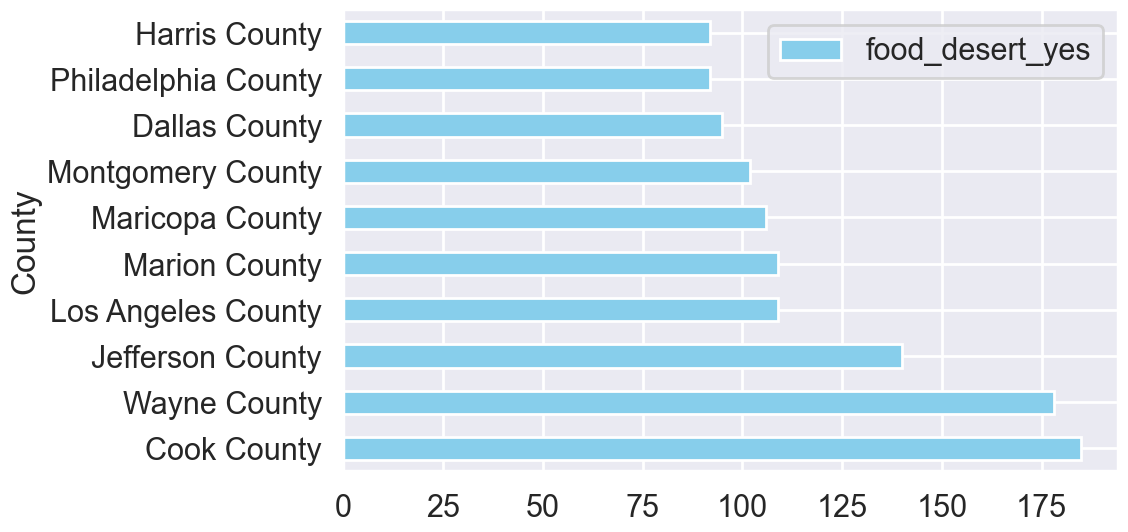

In [172]:
top10_count.plot(x='County', y='food_desert_yes', kind='barh', figsize=(10, 6), color='skyblue')

In [179]:


gdf_tar = gpd.GeoDataFrame(merged_data[['is_desert', 'geometry']], geometry='geometry')
gdf_tar.replace({0: 'No', 1: 'Yes'}, inplace=True)


In [177]:
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Polygon, LineString, Point

/Users/txjxs/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

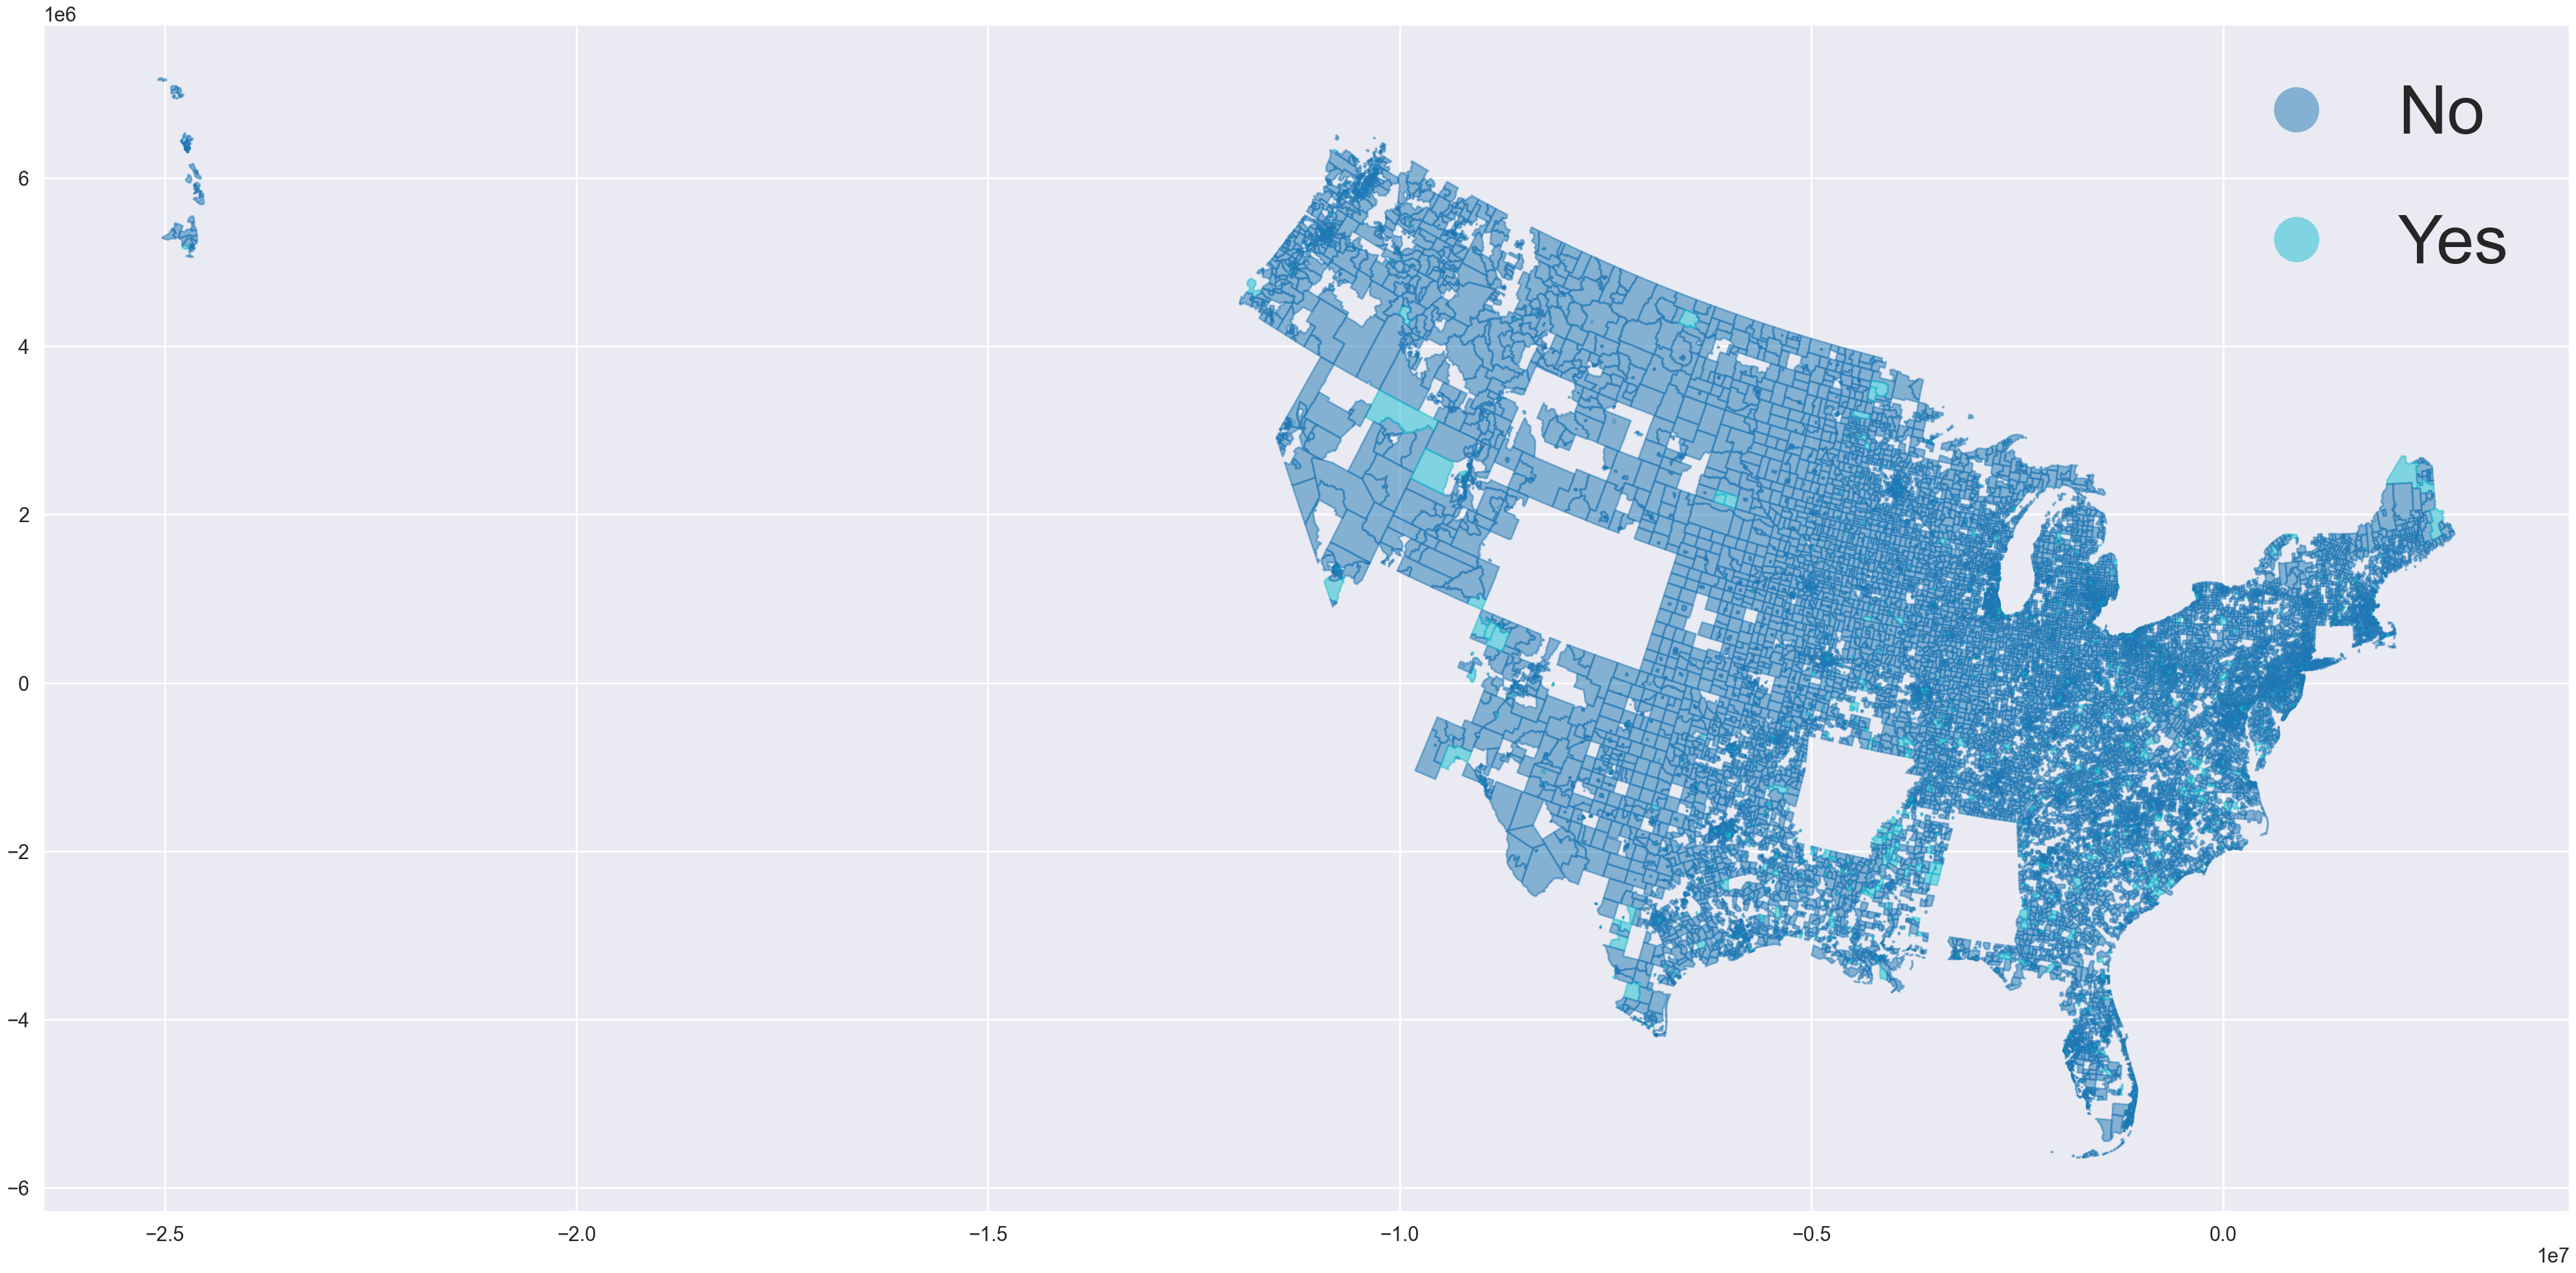

In [ ]:
plt.rcParams.update({'legend.handletextpad':.5,
                    'legend.labelspacing':1,
                    'legend.markerscale':5,
                    'legend.fontsize':75,
                    'legend.frameon':False})

# visualize target on map
fig, ax = plt.subplots(figsize=(50, 40))


ax = gdf_tar.plot(column='is_desert',
                legend=True,
                ax=ax,
                edgecolor='face',
                alpha=0.5)

# add north arrow, https://stackoverflow.com/a/58110049/604456
# x, y, arrow_length = 0.85, 0.10, 0.06
# ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
#             arrowprops=dict(facecolor='black', width=20, headwidth=45),
#             ha='center', va='center', fontsize=40,
#             xycoords=ax.transAxes)

# add scale-bar
# ax.add_artist(ScaleBar(1))

# add basemap
ctx.add_basemap(ax, zoom=9, url=ctx.providers.CartoDB.Positron)

# adjust legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((.20,.95))


# add title
ax.set_title(label="NYC Census Tract Flag Food Desert .5 Mile", fontdict={'fontsize': 100}, loc='center')


ax.set_axis_off()

plt.show();

In [181]:
gdf_tar.to_csv("../DATA/GDF_FoodDesert.csv", index=False)